In [86]:
# Import dataset
import pandas as pd
data = pd.read_csv('/Users/jenn/Downloads/Review.csv')
print(data.head())

                                         review_text  review_score  \
0  I like LocoRoco 2 better than the first, the m...           100   
1  Need for Speed: World could have been a great ...            30   
2  Decent game but Fairly short Pretty hard Overp...            60   
3  The game looks like a great game I have been w...           100   
4  This game is REALLY bad! Everything is out of ...             0   

  review_category  
0        positive  
1        negative  
2           mixed  
3        positive  
4        negative  


In [87]:
data.dtypes

review_text        object
review_score        int64
review_category    object
dtype: object

In [88]:
data.shape

(125974, 3)

In [89]:
# Check for missing values
missing_values = data.isnull().sum()
print("Missing values in each column:")
print(missing_values)

Missing values in each column:
review_text        0
review_score       0
review_category    0
dtype: int64


In [90]:
# Check for duplicate rows
duplicate_rows = data.duplicated().sum()
print(f"Number of duplicate rows: {duplicate_rows}")

Number of duplicate rows: 0


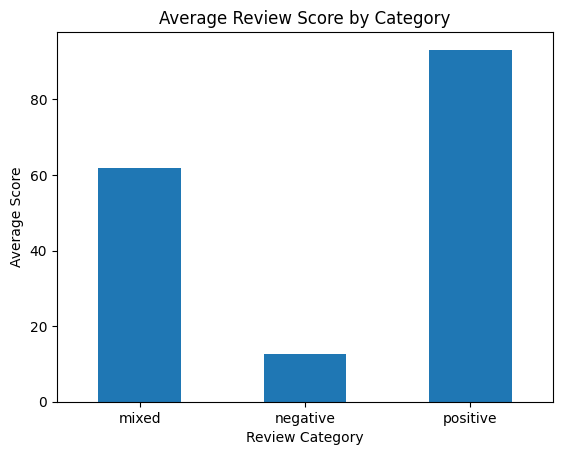

Average Review Score by Category:
review_category
mixed       61.758628
negative    12.675454
positive    93.144715
Name: review_score, dtype: float64


In [91]:
# Simple EDA - Plot the distribution of review_category
import matplotlib.pyplot as plt

data.groupby("review_category")["review_score"].mean().plot(kind="bar")
plt.title("Average Review Score by Category")
plt.xlabel("Review Category")
plt.ylabel("Average Score")
plt.xticks(rotation=0)
plt.show()

# Average review score by category
average_score = data.groupby("review_category")["review_score"].mean()
print(f"Average Review Score by Category:\n{average_score}")


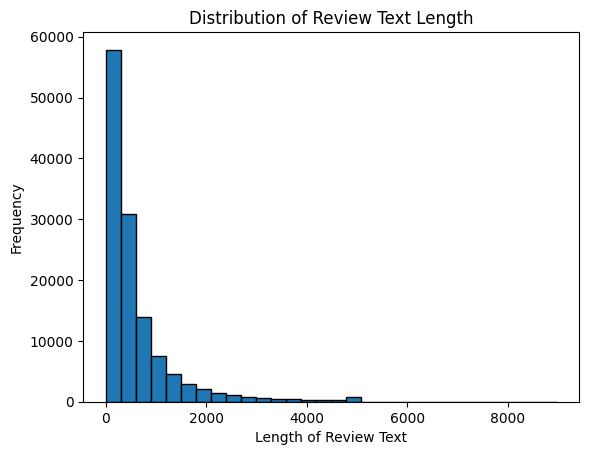

count    125974.000000
mean        607.680347
std         759.948133
min           3.000000
25%         178.000000
50%         336.000000
75%         699.000000
max        8973.000000
Name: review_length, dtype: float64

In [92]:
# Review text length distribution
data['review_length'] = data['review_text'].apply(len)
plt.hist(data['review_length'], bins=30, edgecolor='k')
plt.title("Distribution of Review Text Length")
plt.xlabel("Length of Review Text")
plt.ylabel("Frequency")
plt.show()

data['review_length'].describe()

In [93]:
# Data Preprocessing

import re
import emoji

def preprocess_text(text):
    # lowercase
    text = text.lower()
    # convert emojis to text
    text = emoji.demojize(text, delimiters=(" ", " "))
    # replace underscores in emoji text with spaces
    text = text.replace("_", " ")
    # remove punctuation & special characters
    text = re.sub(r'[^a-z_\s]', '', text)
    # remove extra whitespace
    text = re.sub(r'\s+', ' ', text).strip()
    return text
    


In [94]:
import nltk

data['clean_review'] = data['review_text'].apply(preprocess_text)

In [95]:
# Label Encoding

review_order = {'negative': 0, 'mixed': 1, 'positive': 2}
data['review_category_encoded'] = data['review_category'].map(review_order)
print(data)

                                              review_text  review_score  \
0       I like LocoRoco 2 better than the first, the m...           100   
1       Need for Speed: World could have been a great ...            30   
2       Decent game but Fairly short Pretty hard Overp...            60   
3       The game looks like a great game I have been w...           100   
4       This game is REALLY bad! Everything is out of ...             0   
...                                                   ...           ...   
125969  One of the greatest franchises in terms of the...            90   
125970  $4.99 on Steam sale, and I'm having a great ti...           100   
125971  I've played it maybe a bit late in terms of ti...            90   
125972  An *astonishingly* unsatisfying game. I'm anot...             0   
125973  https://www.gamespot.com/articles/gran-turismo...             0   

       review_category  review_length  \
0             positive            387   
1             neg

In [96]:
# Variable assignment

x = data['clean_review']
y = data['review_category_encoded']

In [97]:
# Data splitting

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 42, stratify = y) 

# Train and Test shape

print("x_train shape:", x_train.shape)
print("x_test shape:", x_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

x_train shape: (88181,)
x_test shape: (37793,)
y_train shape: (88181,)
y_test shape: (37793,)


In [98]:
# TF-IDF Vectorization

from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer()
x_train_vec = vectorizer.fit_transform(x_train)
x_test_vec = vectorizer.transform(x_test)

review_category_encoded
2    73959
0    31789
1    20226
Name: count, dtype: int64


<Axes: xlabel='review_category', ylabel='count'>

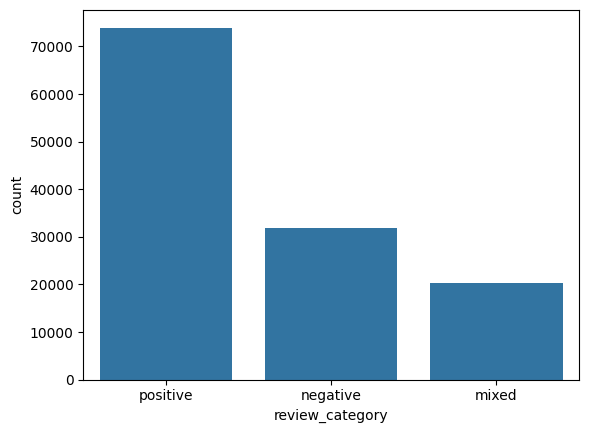

In [99]:
# Value counts

print(data['review_category_encoded'].value_counts())

import seaborn as sns
sns.countplot(x = data['review_category'])

In [100]:
# Logistic Regression Base Model
# Not using Undersampling for Logistic Regression

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.metrics import f1_score, classification_report, accuracy_score

LR_classifier = LogisticRegression(class_weight='balanced').fit(x_train_vec, y_train)
predicted_LR= LR_classifier.predict(x_test_vec)
print("F1 Score of LR:", f1_score(y_test, predicted_LR, average = 'weighted'))
print("Accuracy of LR:", accuracy_score(y_test, predicted_LR))
print("Classification Report:\n", classification_report(y_test, predicted_LR))


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:473: ConvergenceWarning: lbfgs failed to converge after 100 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=100).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


F1 Score of LR: 0.7871589210414839
Accuracy of LR: 0.7759638028206282
Classification Report:
               precision    recall  f1-score   support

           0       0.78      0.79      0.79      9537
           1       0.44      0.62      0.52      6068
           2       0.92      0.81      0.86     22188

    accuracy                           0.78     37793
   macro avg       0.71      0.74      0.72     37793
weighted avg       0.81      0.78      0.79     37793



In [102]:
from sklearn.naive_bayes import ComplementNB
from sklearn.metrics import f1_score, classification_report

CNB_classifier = ComplementNB().fit(x_train_vec, y_train)
predicted_CNB = CNB_classifier.predict(x_test_vec)
print("F1 Score of CNB:", f1_score(y_test, predicted_CNB, average = 'weighted'))
print("Accuracy of CNB:", accuracy_score(y_test, predicted_CNB))
print("Classification Report:\n", classification_report(y_test, predicted_CNB))

F1 Score of CNB: 0.6878235888113464
Accuracy of CNB: 0.7498213954965205
Classification Report:
               precision    recall  f1-score   support

           0       0.80      0.70      0.75      9537
           1       0.52      0.02      0.05      6068
           2       0.74      0.97      0.84     22188

    accuracy                           0.75     37793
   macro avg       0.69      0.56      0.54     37793
weighted avg       0.72      0.75      0.69     37793



In [103]:
# Random Forest Classifier from Sklearn
# Not using Undersampling for Random Forest

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score, classification_report

RF_classifier = RandomForestClassifier(class_weight='balanced').fit(x_train_vec, y_train)
predicted_RF = RF_classifier.predict(x_test_vec)
print("F1 Score of RF:", f1_score(y_test, predicted_RF, average = 'weighted'))
print("Accuracy of RF:", accuracy_score(y_test, predicted_RF))
print("Classification Report:\n", classification_report(y_test, predicted_RF))

F1 Score of RF: 0.6285551357656994
Accuracy of RF: 0.7001296536395629
Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.46      0.61      9537
           1       0.56      0.02      0.03      6068
           2       0.67      0.99      0.80     22188

    accuracy                           0.70     37793
   macro avg       0.70      0.49      0.48     37793
weighted avg       0.71      0.70      0.63     37793



In [104]:
# SVC Classifier from Sklearn
# Not using Undersampling for SVC

from sklearn.svm import SVC
from sklearn.metrics import f1_score, classification_report

SVC_classifier = SVC(class_weight = 'balanced').fit(x_train_vec, y_train)
predicted_SVC= SVC_classifier.predict(x_test_vec)
print("F1 Score of SVC:", f1_score(y_test, predicted_SVC, average = 'weighted'))
print("Accuracy of SVC:", accuracy_score(y_test, predicted_SVC))
print("Classification Report:\n", classification_report(y_test, predicted_SVC))

F1 Score of SVC: 0.8024222105220244
Accuracy of SVC: 0.7984282803693806
Classification Report:
               precision    recall  f1-score   support

           0       0.78      0.81      0.80      9537
           1       0.49      0.56      0.52      6068
           2       0.90      0.86      0.88     22188

    accuracy                           0.80     37793
   macro avg       0.73      0.74      0.73     37793
weighted avg       0.81      0.80      0.80     37793



In [105]:
# Multi Layer Perceptron Classifier from Sklearn
# Not using Undersampling for MLP

from sklearn.neural_network import MLPClassifier
from sklearn.metrics import f1_score, classification_report

MLP_classifier = MLPClassifier().fit(x_train_vec, y_train)
predicted_MLP = MLP_classifier.predict(x_test_vec)
print("F1 Score of MLP:", f1_score(y_test, predicted_MLP, average = 'weighted'))
print("Accuracy of MLP:", accuracy_score(y_test, predicted_MLP))
print("Classification Report:\n", classification_report(y_test, predicted_MLP))

F1 Score of MLP: 0.7751400567127811
Accuracy of MLP: 0.7760696425263938
Classification Report:
               precision    recall  f1-score   support

           0       0.78      0.75      0.76      9537
           1       0.45      0.44      0.45      6068
           2       0.86      0.88      0.87     22188

    accuracy                           0.78     37793
   macro avg       0.70      0.69      0.69     37793
weighted avg       0.77      0.78      0.78     37793



In [106]:
# LinearSVC Classifier from Sklearn
# Not using Undersampling for LinearSVC

from sklearn.svm import LinearSVC
from sklearn.metrics import f1_score, classification_report

LSVC_classifier = LinearSVC(class_weight='balanced').fit(x_train_vec, y_train)
predicted_LSVC= LSVC_classifier.predict(x_test_vec)
print("F1 Score of LinearSVC:", f1_score(y_test, predicted_LSVC, average = 'weighted'))
print("Accuracy of LinearSVC:", accuracy_score(y_test, predicted_LSVC))
print("Classification Report:\n", classification_report(y_test, predicted_LSVC))

F1 Score of LinearSVC: 0.7929100885845384
Accuracy of LinearSVC: 0.7935331939777207
Classification Report:
               precision    recall  f1-score   support

           0       0.78      0.79      0.78      9537
           1       0.49      0.48      0.48      6068
           2       0.88      0.88      0.88     22188

    accuracy                           0.79     37793
   macro avg       0.72      0.72      0.72     37793
weighted avg       0.79      0.79      0.79     37793



In [107]:
# ~~~~~~~~~~~~~~~~~~~~~~~ Model Comparison ~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
print("~~~~~~~~~~~~~~ Accuracies of the Classifiers ~~~~~~~~~~~~~~~~~~~~~~~~~")
print("\nF1 Score of MNB Classifier:", f1_score(y_test, predicted_MNB, average = 'weighted'))
print("\nF1 Score of LR Classifier:", f1_score(y_test, predicted_LR, average = 'weighted'))
print("\nF1 Score of RF Classifier:", f1_score(y_test, predicted_RF, average = 'weighted'))
print("\nF1 Score of SVC Classifier:", f1_score(y_test, predicted_SVC, average = 'weighted'))
print("\nF1 Score of MLP Classifier:", f1_score(y_test, predicted_MLP, average = 'weighted'))
print("\nF1 Score of LSVC Classifier:", f1_score(y_test, predicted_LSVC, average = 'weighted'))

~~~~~~~~~~~~~~ Accuracies of the Classifiers ~~~~~~~~~~~~~~~~~~~~~~~~~

F1 Score of MNB Classifier: 0.5747958105456561

F1 Score of LR Classifier: 0.7871589210414839

F1 Score of RF Classifier: 0.6285551357656994

F1 Score of SVC Classifier: 0.8024222105220244

F1 Score of MLP Classifier: 0.7751400567127811

F1 Score of LSVC Classifier: 0.7929100885845384


In [117]:
# A subset for faster Hyperparameter Tuning

x_sub, _, y_sub, _ = train_test_split(
    x_train, y_train,
    train_size=0.5,
    stratify=y_train,
    random_state=42
)


In [118]:
# Hyperparameter Tuning with Pipeline for SVC

from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import SVC

svc_pipeline = Pipeline([
    ('tfidf', TfidfVectorizer()),   
    ('clf', SVC())            
])

In [ ]:
# Hyperparameter Tuning for SVC

from sklearn.model_selection import RandomizedSearchCV
import numpy as np

param_dist = {
    'tfidf__max_features': [3000, 5000, 10000, None],
    'tfidf__ngram_range': [(1,1), (1,2)],
    'tfidf__min_df': [1, 2, 5],
    'tfidf__max_df': [0.75, 0.9, 1.0],
    'clf__C': [0.01, 0.1, 0.5, 1, 2],
    'clf__class_weight': ['balanced'],
    'clf__kernel': ['linear', 'rbf'],
    'clf__gamma': [1e-3, 1e-2, 1, 10],
}

search = RandomizedSearchCV(
    svc_pipeline,
    param_distributions=param_dist,
    n_iter=24,
    cv=3,
    scoring='f1_weighted',
    n_jobs=-1,
    random_state=42,
    verbose=2
)

search.fit(x_sub, y_sub)

print("Best parameters:", search.best_params_)
print("Best CV score (weighted f1):", search.best_score_)

Fitting 3 folds for each of 24 candidates, totalling 72 fits
[CV] END clf__C=0.5, clf__class_weight=balanced, clf__gamma=0.001, clf__kernel=rbf, tfidf__max_df=1.0, tfidf__max_features=None, tfidf__min_df=5, tfidf__ngram_range=(1, 1); total time=14.4min
[CV] END clf__C=0.5, clf__class_weight=balanced, clf__gamma=0.001, clf__kernel=rbf, tfidf__max_df=1.0, tfidf__max_features=None, tfidf__min_df=5, tfidf__ngram_range=(1, 1); total time=14.4min
[CV] END clf__C=0.5, clf__class_weight=balanced, clf__gamma=0.001, clf__kernel=rbf, tfidf__max_df=1.0, tfidf__max_features=None, tfidf__min_df=5, tfidf__ngram_range=(1, 1); total time=14.5min
[CV] END clf__C=0.1, clf__class_weight=balanced, clf__gamma=0.01, clf__kernel=rbf, tfidf__max_df=1.0, tfidf__max_features=None, tfidf__min_df=2, tfidf__ngram_range=(1, 1); total time=14.8min
[CV] END clf__C=0.1, clf__class_weight=balanced, clf__gamma=0.01, clf__kernel=rbf, tfidf__max_df=1.0, tfidf__max_features=None, tfidf__min_df=2, tfidf__ngram_range=(1, 1); 

In [ ]:
# set final_model to the svc best estimator

final_svcmodel = search.best_estimator_
final_svcmodel.fit(x_train, y_train)
y_final_predsvc = final_svcmodel.predict(x_test)

In [18]:
from sklearn.metrics import f1_score, classification_report, accuracy_score
print("Final Weighted F1:", f1_score(y_test, y_final_predsvc, average='weighted'))
print("accuracy_score:", accuracy_score(y_test, y_final_predsvc))
print(classification_report(y_test, y_final_predsvc))

Final Weighted F1: 0.813750432786445
accuracy_score: 0.8090651707988252
              precision    recall  f1-score   support

           0       0.80      0.82      0.81      9537
           1       0.50      0.58      0.54      6068
           2       0.92      0.87      0.89     22188

    accuracy                           0.81     37793
   macro avg       0.74      0.76      0.75     37793
weighted avg       0.82      0.81      0.81     37793



In [110]:
# Hyperparameter Tuning with Pipeline for LinearSVC

from sklearn.svm import LinearSVC

linearsvc_pipeline = Pipeline([
    ('tfidf', TfidfVectorizer()),   
    ('clf', LinearSVC())            
])

In [111]:
# Hyperparameter Tuning for LinearSVC

from sklearn.model_selection import RandomizedSearchCV
import numpy as np

lsvc_param_dist = {
    'tfidf__max_features': [3000, 5000, 10000, None],
    'tfidf__ngram_range': [(1,1), (1,2)],
    'tfidf__min_df': [1, 2, 5],
    'tfidf__max_df': [0.75, 0.9, 1.0],
    'clf__C': [0.01, 0.1, 0.5, 1, 2],
    'clf__class_weight': ['balanced'],
}

lsvcsearch = RandomizedSearchCV(
    linearsvc_pipeline,
    param_distributions=lsvc_param_dist,
    n_iter=24,
    cv=3,
    scoring='f1_weighted',
    n_jobs=-1,
    random_state=42,
    verbose=2
)

lsvcsearch.fit(x_train, y_train)

print("Best parameters:", lsvcsearch.best_params_)
print("Best CV score (weighted f1):", lsvcsearch.best_score_)

Fitting 3 folds for each of 24 candidates, totalling 72 fits
[CV] END clf__C=0.01, clf__class_weight=balanced, tfidf__max_df=0.9, tfidf__max_features=None, tfidf__min_df=1, tfidf__ngram_range=(1, 1); total time=   6.1s
[CV] END clf__C=0.01, clf__class_weight=balanced, tfidf__max_df=0.9, tfidf__max_features=None, tfidf__min_df=1, tfidf__ngram_range=(1, 1); total time=   6.2s
[CV] END clf__C=0.01, clf__class_weight=balanced, tfidf__max_df=0.9, tfidf__max_features=None, tfidf__min_df=1, tfidf__ngram_range=(1, 1); total time=   6.1s
[CV] END clf__C=1, clf__class_weight=balanced, tfidf__max_df=0.75, tfidf__max_features=5000, tfidf__min_df=2, tfidf__ngram_range=(1, 1); total time=   9.1s
[CV] END clf__C=1, clf__class_weight=balanced, tfidf__max_df=0.75, tfidf__max_features=5000, tfidf__min_df=2, tfidf__ngram_range=(1, 1); total time=   9.2s
[CV] END clf__C=1, clf__class_weight=balanced, tfidf__max_df=0.75, tfidf__max_features=5000, tfidf__min_df=2, tfidf__ngram_range=(1, 1); total time=   9.

In [112]:
# set final_model to the lsvc best estimator

final_lsvcmodel = lsvcsearch.best_estimator_

y_final_predlsvc = final_lsvcmodel.predict(x_test)

print("Final Weighted F1:", f1_score(y_test, y_final_predlsvc, average='weighted'))
print("accuracy_score:", accuracy_score(y_test, y_final_predlsvc))
print(classification_report(y_test, y_final_predlsvc))

Final Weighted F1: 0.8199984688874999
accuracy_score: 0.8230095520334454
              precision    recall  f1-score   support

           0       0.80      0.83      0.82      9537
           1       0.57      0.50      0.53      6068
           2       0.89      0.91      0.90     22188

    accuracy                           0.82     37793
   macro avg       0.75      0.75      0.75     37793
weighted avg       0.82      0.82      0.82     37793



In [113]:
# Model F1 Score

from sklearn.metrics import f1_score

f1 = f1_score(y_test, y_final_predlsvc, average='weighted')
print("Model F1 score:", f1)


Model F1 score: 0.8199984688874999


In [ ]:
# Save the Model and F1 Score

import joblib

# Save the trained LSVC model
joblib.dump(final_lsvcmodel, "final_sentiment_model.joblib")

# Save the f1 score
joblib.dump(f1, "model_f1_score.joblib")



In [81]:
# Testing
sentence = ["😞"]

# Predict
prediction = final_lsvcmodel.predict(sentence)[0]

# Map label to text
label_map = {
    0: "Negative",
    1: "Neutral",
    2: "Positive"
}

print("Predicted label:", prediction)
print("Predicted sentiment:", label_map[prediction])


Predicted label: 2
Predicted sentiment: Positive


In [85]:
# See the result after preprocessing
preprocessed_sentence = preprocess_text("😁")
print("Preprocessed sentence:", preprocessed_sentence)

# Predict with the model
prediction = final_lsvcmodel.predict([preprocessed_sentence])[0]
print("Predicted label:", prediction)
print("Predicted sentiment:", label_map[prediction])

Preprocessed sentence: beaming face with smiling eyes
Predicted label: 2
Predicted sentiment: Positive


In [114]:
# Include lemmatization in preprocessing for comparison purposes

import re
import emoji
from nltk.stem import WordNetLemmatizer, PorterStemmer
from nltk.tokenize import word_tokenize

def lemmatize_tokenizer(text):
    text = text.lower()
    text = emoji.demojize(text, delimiters=(" ", " "))
    text = re.sub(r'[^a-z_\s]', '', text)
    tokens = word_tokenize(text)
    lemmatizer = WordNetLemmatizer()
    return [lemmatizer.lemmatize(t) for t in tokens]


In [115]:
pipeline_lem = Pipeline([
    ('tfidf', TfidfVectorizer(tokenizer=lemmatize_tokenizer)),
    ('clf', LinearSVC())
])

param_dist_lem = {
    'tfidf__max_features': [3000, 5000, 10000, None],
    'tfidf__ngram_range': [(1,1), (1,2)],
    'tfidf__min_df': [1, 2, 5],
    'tfidf__max_df': [0.75, 0.9, 1.0],
    'clf__C': [0.01, 0.1, 0.5, 1, 2],
    'clf__class_weight': ['balanced']
}

search_lem = RandomizedSearchCV(
    pipeline_lem,
    param_distributions=param_dist_lem,
    n_iter=24,
    cv=3,
    scoring='f1_weighted',
    n_jobs=-1,
    random_state=42,
    verbose=2
)

search_lem.fit(x_train, y_train)
y_pred_lem = search_lem.predict(x_test)
print("F1 Score with Lemmatization:", f1_score(y_test, y_pred_lem, average='weighted'))
print("Accuracy with Lemmatization:", accuracy_score(y_test, y_pred_lem))
print("Classification Report with Lemmatization:\n", classification_report(y_test, y_pred_lem))


Fitting 3 folds for each of 24 candidates, totalling 72 fits


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/feature_extraction/text.py:517: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/feature_extraction/text.py:517: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/feature_extraction/text.py:517: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/feature_extraction/text.py:517: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/

[CV] END clf__C=0.01, clf__class_weight=balanced, tfidf__max_df=0.9, tfidf__max_features=None, tfidf__min_df=1, tfidf__ngram_range=(1, 1); total time= 1.4min
[CV] END clf__C=0.01, clf__class_weight=balanced, tfidf__max_df=0.9, tfidf__max_features=None, tfidf__min_df=1, tfidf__ngram_range=(1, 1); total time= 1.4min


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/feature_extraction/text.py:517: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/feature_extraction/text.py:517: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


[CV] END clf__C=0.01, clf__class_weight=balanced, tfidf__max_df=0.9, tfidf__max_features=None, tfidf__min_df=1, tfidf__ngram_range=(1, 1); total time= 1.4min


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/feature_extraction/text.py:517: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


[CV] END clf__C=1, clf__class_weight=balanced, tfidf__max_df=0.75, tfidf__max_features=5000, tfidf__min_df=2, tfidf__ngram_range=(1, 1); total time= 1.5min
[CV] END clf__C=1, clf__class_weight=balanced, tfidf__max_df=0.75, tfidf__max_features=5000, tfidf__min_df=2, tfidf__ngram_range=(1, 1); total time= 1.5min


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/feature_extraction/text.py:517: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


[CV] END clf__C=1, clf__class_weight=balanced, tfidf__max_df=0.75, tfidf__max_features=5000, tfidf__min_df=2, tfidf__ngram_range=(1, 1); total time= 1.5min


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/feature_extraction/text.py:517: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/feature_extraction/text.py:517: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


[CV] END clf__C=1, clf__class_weight=balanced, tfidf__max_df=1.0, tfidf__max_features=None, tfidf__min_df=2, tfidf__ngram_range=(1, 2); total time= 1.7min


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/feature_extraction/text.py:517: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


[CV] END clf__C=1, clf__class_weight=balanced, tfidf__max_df=1.0, tfidf__max_features=None, tfidf__min_df=2, tfidf__ngram_range=(1, 2); total time= 1.7min


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/feature_extraction/text.py:517: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


[CV] END clf__C=0.01, clf__class_weight=balanced, tfidf__max_df=1.0, tfidf__max_features=5000, tfidf__min_df=2, tfidf__ngram_range=(1, 1); total time= 1.5min
[CV] END clf__C=0.01, clf__class_weight=balanced, tfidf__max_df=1.0, tfidf__max_features=5000, tfidf__min_df=2, tfidf__ngram_range=(1, 1); total time= 1.5min


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/feature_extraction/text.py:517: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/feature_extraction/text.py:517: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


[CV] END clf__C=2, clf__class_weight=balanced, tfidf__max_df=0.75, tfidf__max_features=10000, tfidf__min_df=2, tfidf__ngram_range=(1, 1); total time= 1.6min
[CV] END clf__C=2, clf__class_weight=balanced, tfidf__max_df=0.75, tfidf__max_features=10000, tfidf__min_df=2, tfidf__ngram_range=(1, 1); total time= 1.6min


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/feature_extraction/text.py:517: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/feature_extraction/text.py:517: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


[CV] END clf__C=2, clf__class_weight=balanced, tfidf__max_df=0.75, tfidf__max_features=10000, tfidf__min_df=2, tfidf__ngram_range=(1, 1); total time= 1.6min


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/feature_extraction/text.py:517: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


[CV] END clf__C=0.01, clf__class_weight=balanced, tfidf__max_df=1.0, tfidf__max_features=5000, tfidf__min_df=2, tfidf__ngram_range=(1, 1); total time= 1.5min
[CV] END clf__C=1, clf__class_weight=balanced, tfidf__max_df=1.0, tfidf__max_features=None, tfidf__min_df=2, tfidf__ngram_range=(1, 2); total time= 1.7min


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/feature_extraction/text.py:517: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/feature_extraction/text.py:517: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


[CV] END clf__C=1, clf__class_weight=balanced, tfidf__max_df=1.0, tfidf__max_features=5000, tfidf__min_df=2, tfidf__ngram_range=(1, 1); total time= 1.5min


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/feature_extraction/text.py:517: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


[CV] END clf__C=1, clf__class_weight=balanced, tfidf__max_df=1.0, tfidf__max_features=5000, tfidf__min_df=2, tfidf__ngram_range=(1, 1); total time= 1.5min


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/feature_extraction/text.py:517: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


[CV] END clf__C=1, clf__class_weight=balanced, tfidf__max_df=1.0, tfidf__max_features=5000, tfidf__min_df=2, tfidf__ngram_range=(1, 1); total time= 1.5min


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/feature_extraction/text.py:517: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


[CV] END clf__C=0.01, clf__class_weight=balanced, tfidf__max_df=0.75, tfidf__max_features=10000, tfidf__min_df=2, tfidf__ngram_range=(1, 2); total time= 1.7min


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/feature_extraction/text.py:517: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


[CV] END clf__C=0.01, clf__class_weight=balanced, tfidf__max_df=0.75, tfidf__max_features=10000, tfidf__min_df=2, tfidf__ngram_range=(1, 2); total time= 1.7min


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/feature_extraction/text.py:517: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


[CV] END clf__C=0.01, clf__class_weight=balanced, tfidf__max_df=0.75, tfidf__max_features=10000, tfidf__min_df=2, tfidf__ngram_range=(1, 2); total time= 1.7min


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/feature_extraction/text.py:517: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


[CV] END clf__C=0.01, clf__class_weight=balanced, tfidf__max_df=1.0, tfidf__max_features=5000, tfidf__min_df=2, tfidf__ngram_range=(1, 2); total time= 1.7min


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/feature_extraction/text.py:517: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


[CV] END clf__C=0.01, clf__class_weight=balanced, tfidf__max_df=1.0, tfidf__max_features=5000, tfidf__min_df=2, tfidf__ngram_range=(1, 2); total time= 1.7min


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/feature_extraction/text.py:517: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


[CV] END clf__C=0.01, clf__class_weight=balanced, tfidf__max_df=1.0, tfidf__max_features=5000, tfidf__min_df=2, tfidf__ngram_range=(1, 2); total time= 1.7min


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/feature_extraction/text.py:517: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


[CV] END clf__C=1, clf__class_weight=balanced, tfidf__max_df=0.9, tfidf__max_features=5000, tfidf__min_df=2, tfidf__ngram_range=(1, 1); total time= 1.5min


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/feature_extraction/text.py:517: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


[CV] END clf__C=1, clf__class_weight=balanced, tfidf__max_df=0.9, tfidf__max_features=5000, tfidf__min_df=2, tfidf__ngram_range=(1, 1); total time= 1.5min


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/feature_extraction/text.py:517: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


[CV] END clf__C=0.1, clf__class_weight=balanced, tfidf__max_df=1.0, tfidf__max_features=3000, tfidf__min_df=5, tfidf__ngram_range=(1, 1); total time= 1.5min


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/feature_extraction/text.py:517: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


[CV] END clf__C=1, clf__class_weight=balanced, tfidf__max_df=0.9, tfidf__max_features=5000, tfidf__min_df=2, tfidf__ngram_range=(1, 1); total time= 1.5min


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/feature_extraction/text.py:517: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


[CV] END clf__C=0.1, clf__class_weight=balanced, tfidf__max_df=1.0, tfidf__max_features=3000, tfidf__min_df=5, tfidf__ngram_range=(1, 1); total time= 1.5min


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/feature_extraction/text.py:517: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


[CV] END clf__C=0.1, clf__class_weight=balanced, tfidf__max_df=1.0, tfidf__max_features=3000, tfidf__min_df=5, tfidf__ngram_range=(1, 1); total time= 1.5min
[CV] END clf__C=0.1, clf__class_weight=balanced, tfidf__max_df=0.75, tfidf__max_features=5000, tfidf__min_df=5, tfidf__ngram_range=(1, 1); total time= 1.5min


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/feature_extraction/text.py:517: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/feature_extraction/text.py:517: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


[CV] END clf__C=0.1, clf__class_weight=balanced, tfidf__max_df=0.75, tfidf__max_features=5000, tfidf__min_df=5, tfidf__ngram_range=(1, 1); total time= 1.5min


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/feature_extraction/text.py:517: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


[CV] END clf__C=0.1, clf__class_weight=balanced, tfidf__max_df=0.75, tfidf__max_features=5000, tfidf__min_df=5, tfidf__ngram_range=(1, 1); total time= 1.5min


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/feature_extraction/text.py:517: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


[CV] END clf__C=2, clf__class_weight=balanced, tfidf__max_df=1.0, tfidf__max_features=None, tfidf__min_df=1, tfidf__ngram_range=(1, 1); total time= 1.6min


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/feature_extraction/text.py:517: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


[CV] END clf__C=0.5, clf__class_weight=balanced, tfidf__max_df=1.0, tfidf__max_features=None, tfidf__min_df=1, tfidf__ngram_range=(1, 1); total time= 1.5min


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/feature_extraction/text.py:517: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


[CV] END clf__C=2, clf__class_weight=balanced, tfidf__max_df=1.0, tfidf__max_features=None, tfidf__min_df=1, tfidf__ngram_range=(1, 1); total time= 1.6min


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/feature_extraction/text.py:517: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


[CV] END clf__C=0.5, clf__class_weight=balanced, tfidf__max_df=1.0, tfidf__max_features=None, tfidf__min_df=1, tfidf__ngram_range=(1, 1); total time= 1.5min
[CV] END clf__C=2, clf__class_weight=balanced, tfidf__max_df=1.0, tfidf__max_features=None, tfidf__min_df=1, tfidf__ngram_range=(1, 1); total time= 1.6min


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/feature_extraction/text.py:517: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/feature_extraction/text.py:517: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


[CV] END clf__C=0.5, clf__class_weight=balanced, tfidf__max_df=1.0, tfidf__max_features=None, tfidf__min_df=1, tfidf__ngram_range=(1, 1); total time= 1.5min


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/feature_extraction/text.py:517: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


[CV] END clf__C=2, clf__class_weight=balanced, tfidf__max_df=1.0, tfidf__max_features=3000, tfidf__min_df=2, tfidf__ngram_range=(1, 2); total time= 1.8min


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/feature_extraction/text.py:517: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


[CV] END clf__C=2, clf__class_weight=balanced, tfidf__max_df=1.0, tfidf__max_features=3000, tfidf__min_df=2, tfidf__ngram_range=(1, 2); total time= 1.8min


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/feature_extraction/text.py:517: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


[CV] END clf__C=0.1, clf__class_weight=balanced, tfidf__max_df=1.0, tfidf__max_features=5000, tfidf__min_df=1, tfidf__ngram_range=(1, 1); total time= 1.5min


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/feature_extraction/text.py:517: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


[CV] END clf__C=0.1, clf__class_weight=balanced, tfidf__max_df=1.0, tfidf__max_features=5000, tfidf__min_df=1, tfidf__ngram_range=(1, 1); total time= 1.5min


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/feature_extraction/text.py:517: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


[CV] END clf__C=2, clf__class_weight=balanced, tfidf__max_df=1.0, tfidf__max_features=3000, tfidf__min_df=2, tfidf__ngram_range=(1, 2); total time= 1.8min


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/feature_extraction/text.py:517: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


[CV] END clf__C=0.1, clf__class_weight=balanced, tfidf__max_df=0.9, tfidf__max_features=None, tfidf__min_df=5, tfidf__ngram_range=(1, 2); total time= 1.7min


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/feature_extraction/text.py:517: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


[CV] END clf__C=0.1, clf__class_weight=balanced, tfidf__max_df=0.9, tfidf__max_features=None, tfidf__min_df=5, tfidf__ngram_range=(1, 2); total time= 1.7min


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/feature_extraction/text.py:517: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


[CV] END clf__C=0.1, clf__class_weight=balanced, tfidf__max_df=0.9, tfidf__max_features=None, tfidf__min_df=5, tfidf__ngram_range=(1, 2); total time= 1.7min


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/feature_extraction/text.py:517: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


[CV] END clf__C=0.1, clf__class_weight=balanced, tfidf__max_df=1.0, tfidf__max_features=5000, tfidf__min_df=1, tfidf__ngram_range=(1, 1); total time= 1.6min


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/feature_extraction/text.py:517: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


[CV] END clf__C=2, clf__class_weight=balanced, tfidf__max_df=0.75, tfidf__max_features=10000, tfidf__min_df=1, tfidf__ngram_range=(1, 1); total time= 1.6min


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/feature_extraction/text.py:517: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


[CV] END clf__C=2, clf__class_weight=balanced, tfidf__max_df=0.75, tfidf__max_features=10000, tfidf__min_df=1, tfidf__ngram_range=(1, 1); total time= 1.6min


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/feature_extraction/text.py:517: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


[CV] END clf__C=0.5, clf__class_weight=balanced, tfidf__max_df=1.0, tfidf__max_features=5000, tfidf__min_df=5, tfidf__ngram_range=(1, 2); total time= 1.8min


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/feature_extraction/text.py:517: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


[CV] END clf__C=2, clf__class_weight=balanced, tfidf__max_df=0.75, tfidf__max_features=10000, tfidf__min_df=1, tfidf__ngram_range=(1, 1); total time= 1.6min


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/feature_extraction/text.py:517: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


[CV] END clf__C=0.5, clf__class_weight=balanced, tfidf__max_df=1.0, tfidf__max_features=5000, tfidf__min_df=5, tfidf__ngram_range=(1, 2); total time= 1.8min


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/feature_extraction/text.py:517: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


[CV] END clf__C=0.5, clf__class_weight=balanced, tfidf__max_df=1.0, tfidf__max_features=5000, tfidf__min_df=5, tfidf__ngram_range=(1, 2); total time= 1.8min


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/feature_extraction/text.py:517: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


[CV] END clf__C=0.1, clf__class_weight=balanced, tfidf__max_df=1.0, tfidf__max_features=None, tfidf__min_df=1, tfidf__ngram_range=(1, 2); total time= 1.7min


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/feature_extraction/text.py:517: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


[CV] END clf__C=0.1, clf__class_weight=balanced, tfidf__max_df=1.0, tfidf__max_features=None, tfidf__min_df=1, tfidf__ngram_range=(1, 2); total time= 1.7min


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/feature_extraction/text.py:517: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


[CV] END clf__C=2, clf__class_weight=balanced, tfidf__max_df=1.0, tfidf__max_features=None, tfidf__min_df=2, tfidf__ngram_range=(1, 1); total time= 1.6min


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/feature_extraction/text.py:517: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


[CV] END clf__C=0.1, clf__class_weight=balanced, tfidf__max_df=1.0, tfidf__max_features=None, tfidf__min_df=2, tfidf__ngram_range=(1, 1); total time= 1.5min


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/feature_extraction/text.py:517: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


[CV] END clf__C=0.1, clf__class_weight=balanced, tfidf__max_df=1.0, tfidf__max_features=None, tfidf__min_df=2, tfidf__ngram_range=(1, 1); total time= 1.5min


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/feature_extraction/text.py:517: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


[CV] END clf__C=2, clf__class_weight=balanced, tfidf__max_df=1.0, tfidf__max_features=None, tfidf__min_df=2, tfidf__ngram_range=(1, 1); total time= 1.6min


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/feature_extraction/text.py:517: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


[CV] END clf__C=2, clf__class_weight=balanced, tfidf__max_df=1.0, tfidf__max_features=None, tfidf__min_df=2, tfidf__ngram_range=(1, 1); total time= 1.6min


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/feature_extraction/text.py:517: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


[CV] END clf__C=0.1, clf__class_weight=balanced, tfidf__max_df=1.0, tfidf__max_features=None, tfidf__min_df=2, tfidf__ngram_range=(1, 1); total time= 1.5min


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/feature_extraction/text.py:517: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


[CV] END clf__C=0.1, clf__class_weight=balanced, tfidf__max_df=1.0, tfidf__max_features=None, tfidf__min_df=1, tfidf__ngram_range=(1, 2); total time= 1.7min


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/feature_extraction/text.py:517: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


[CV] END clf__C=1, clf__class_weight=balanced, tfidf__max_df=0.75, tfidf__max_features=5000, tfidf__min_df=1, tfidf__ngram_range=(1, 1); total time= 1.5min


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/feature_extraction/text.py:517: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


[CV] END clf__C=1, clf__class_weight=balanced, tfidf__max_df=0.75, tfidf__max_features=5000, tfidf__min_df=1, tfidf__ngram_range=(1, 1); total time= 1.5min
[CV] END clf__C=1, clf__class_weight=balanced, tfidf__max_df=0.75, tfidf__max_features=5000, tfidf__min_df=1, tfidf__ngram_range=(1, 1); total time= 1.5min
[CV] END clf__C=2, clf__class_weight=balanced, tfidf__max_df=0.9, tfidf__max_features=10000, tfidf__min_df=1, tfidf__ngram_range=(1, 1); total time= 1.6min
[CV] END clf__C=2, clf__class_weight=balanced, tfidf__max_df=0.9, tfidf__max_features=10000, tfidf__min_df=1, tfidf__ngram_range=(1, 1); total time= 1.6min
[CV] END clf__C=2, clf__class_weight=balanced, tfidf__max_df=0.9, tfidf__max_features=10000, tfidf__min_df=1, tfidf__ngram_range=(1, 1); total time= 1.6min
[CV] END clf__C=0.01, clf__class_weight=balanced, tfidf__max_df=0.9, tfidf__max_features=5000, tfidf__min_df=2, tfidf__ngram_range=(1, 2); total time= 1.6min
[CV] END clf__C=0.01, clf__class_weight=balanced, tfidf__max_d

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/feature_extraction/text.py:517: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


F1 Score with Lemmatization: 0.818231375300661
Accuracy with Lemmatization: 0.8212102770354298
Classification Report with Lemmatization:
               precision    recall  f1-score   support

           0       0.80      0.83      0.81      9537
           1       0.56      0.50      0.53      6068
           2       0.89      0.91      0.90     22188

    accuracy                           0.82     37793
   macro avg       0.75      0.74      0.75     37793
weighted avg       0.82      0.82      0.82     37793



In [116]:
def stem_tokenizer(text):
    text = text.lower()
    text = emoji.demojize(text, delimiters=(" ", " "))
    text = re.sub(r'[^a-z_\s]', '', text)
    tokens = word_tokenize(text)
    stemmer = PorterStemmer()
    return [stemmer.stem(t) for t in tokens]

pipeline_stem = Pipeline([
    ('tfidf', TfidfVectorizer(tokenizer=stem_tokenizer)),
    ('clf', LinearSVC())
])

# Hyperparameter Tuning for Stemmer
param_dist_stem = {
    'tfidf__max_features': [3000, 5000, 10000, None],
    'tfidf__ngram_range': [(1,1), (1,2)],
    'tfidf__min_df': [1, 2, 5],
    'tfidf__max_df': [0.75, 0.9, 1.0],
    'clf__C': [0.01, 0.1, 0.5, 1, 2],
    'clf__class_weight': ['balanced']
}

search_stem = RandomizedSearchCV(
    pipeline_stem,
    param_distributions=param_dist_stem,
    n_iter=24,
    cv=3,
    scoring='f1_weighted',
    n_jobs=-1,
    random_state=42,
    verbose=2
)

search_stem.fit(x_train, y_train)
y_pred_stem = search_stem.predict(x_test)
print("F1 Score with Stemming:", f1_score(y_test, y_pred_stem, average='weighted'))
print("Accuracy with Stemming:", accuracy_score(y_test, y_pred_stem))
print("Classification Report with Stemming:\n", classification_report(y_test, y_pred_stem))


Fitting 3 folds for each of 24 candidates, totalling 72 fits


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/feature_extraction/text.py:517: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/feature_extraction/text.py:517: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/feature_extraction/text.py:517: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/feature_extraction/text.py:517: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/

[CV] END clf__C=0.01, clf__class_weight=balanced, tfidf__max_df=0.9, tfidf__max_features=None, tfidf__min_df=1, tfidf__ngram_range=(1, 1); total time= 2.6min


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/feature_extraction/text.py:517: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


[CV] END clf__C=0.01, clf__class_weight=balanced, tfidf__max_df=0.9, tfidf__max_features=None, tfidf__min_df=1, tfidf__ngram_range=(1, 1); total time= 2.6min
[CV] END clf__C=0.01, clf__class_weight=balanced, tfidf__max_df=0.9, tfidf__max_features=None, tfidf__min_df=1, tfidf__ngram_range=(1, 1); total time= 2.6min


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/feature_extraction/text.py:517: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/feature_extraction/text.py:517: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


[CV] END clf__C=1, clf__class_weight=balanced, tfidf__max_df=0.75, tfidf__max_features=5000, tfidf__min_df=2, tfidf__ngram_range=(1, 1); total time= 2.7min
[CV] END clf__C=1, clf__class_weight=balanced, tfidf__max_df=0.75, tfidf__max_features=5000, tfidf__min_df=2, tfidf__ngram_range=(1, 1); total time= 2.7min


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/feature_extraction/text.py:517: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/feature_extraction/text.py:517: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


[CV] END clf__C=1, clf__class_weight=balanced, tfidf__max_df=0.75, tfidf__max_features=5000, tfidf__min_df=2, tfidf__ngram_range=(1, 1); total time= 2.7min


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/feature_extraction/text.py:517: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


[CV] END clf__C=1, clf__class_weight=balanced, tfidf__max_df=1.0, tfidf__max_features=None, tfidf__min_df=2, tfidf__ngram_range=(1, 2); total time= 2.9min
[CV] END clf__C=1, clf__class_weight=balanced, tfidf__max_df=1.0, tfidf__max_features=None, tfidf__min_df=2, tfidf__ngram_range=(1, 2); total time= 2.9min


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/feature_extraction/text.py:517: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/feature_extraction/text.py:517: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


[CV] END clf__C=0.01, clf__class_weight=balanced, tfidf__max_df=1.0, tfidf__max_features=5000, tfidf__min_df=2, tfidf__ngram_range=(1, 1); total time= 2.7min
[CV] END clf__C=0.01, clf__class_weight=balanced, tfidf__max_df=1.0, tfidf__max_features=5000, tfidf__min_df=2, tfidf__ngram_range=(1, 1); total time= 2.7min


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/feature_extraction/text.py:517: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/feature_extraction/text.py:517: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


[CV] END clf__C=2, clf__class_weight=balanced, tfidf__max_df=0.75, tfidf__max_features=10000, tfidf__min_df=2, tfidf__ngram_range=(1, 1); total time= 2.8min


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/feature_extraction/text.py:517: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


[CV] END clf__C=2, clf__class_weight=balanced, tfidf__max_df=0.75, tfidf__max_features=10000, tfidf__min_df=2, tfidf__ngram_range=(1, 1); total time= 2.9min


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/feature_extraction/text.py:517: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


[CV] END clf__C=2, clf__class_weight=balanced, tfidf__max_df=0.75, tfidf__max_features=10000, tfidf__min_df=2, tfidf__ngram_range=(1, 1); total time= 2.9min


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/feature_extraction/text.py:517: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


[CV] END clf__C=1, clf__class_weight=balanced, tfidf__max_df=1.0, tfidf__max_features=None, tfidf__min_df=2, tfidf__ngram_range=(1, 2); total time= 3.0min


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/feature_extraction/text.py:517: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


[CV] END clf__C=0.01, clf__class_weight=balanced, tfidf__max_df=1.0, tfidf__max_features=5000, tfidf__min_df=2, tfidf__ngram_range=(1, 1); total time= 2.8min


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/feature_extraction/text.py:517: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


[CV] END clf__C=1, clf__class_weight=balanced, tfidf__max_df=1.0, tfidf__max_features=5000, tfidf__min_df=2, tfidf__ngram_range=(1, 1); total time= 2.8min


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/feature_extraction/text.py:517: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


[CV] END clf__C=1, clf__class_weight=balanced, tfidf__max_df=1.0, tfidf__max_features=5000, tfidf__min_df=2, tfidf__ngram_range=(1, 1); total time= 2.8min
[CV] END clf__C=1, clf__class_weight=balanced, tfidf__max_df=1.0, tfidf__max_features=5000, tfidf__min_df=2, tfidf__ngram_range=(1, 1); total time= 2.8min


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/feature_extraction/text.py:517: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/feature_extraction/text.py:517: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


[CV] END clf__C=0.01, clf__class_weight=balanced, tfidf__max_df=0.75, tfidf__max_features=10000, tfidf__min_df=2, tfidf__ngram_range=(1, 2); total time= 3.0min


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/feature_extraction/text.py:517: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


[CV] END clf__C=0.01, clf__class_weight=balanced, tfidf__max_df=0.75, tfidf__max_features=10000, tfidf__min_df=2, tfidf__ngram_range=(1, 2); total time= 3.0min


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/feature_extraction/text.py:517: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


[CV] END clf__C=0.01, clf__class_weight=balanced, tfidf__max_df=0.75, tfidf__max_features=10000, tfidf__min_df=2, tfidf__ngram_range=(1, 2); total time= 3.0min


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/feature_extraction/text.py:517: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


[CV] END clf__C=0.01, clf__class_weight=balanced, tfidf__max_df=1.0, tfidf__max_features=5000, tfidf__min_df=2, tfidf__ngram_range=(1, 2); total time= 3.0min


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/feature_extraction/text.py:517: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


[CV] END clf__C=0.01, clf__class_weight=balanced, tfidf__max_df=1.0, tfidf__max_features=5000, tfidf__min_df=2, tfidf__ngram_range=(1, 2); total time= 3.0min


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/feature_extraction/text.py:517: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


[CV] END clf__C=0.01, clf__class_weight=balanced, tfidf__max_df=1.0, tfidf__max_features=5000, tfidf__min_df=2, tfidf__ngram_range=(1, 2); total time= 2.9min


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/feature_extraction/text.py:517: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


[CV] END clf__C=1, clf__class_weight=balanced, tfidf__max_df=0.9, tfidf__max_features=5000, tfidf__min_df=2, tfidf__ngram_range=(1, 1); total time= 3.0min


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/feature_extraction/text.py:517: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


[CV] END clf__C=1, clf__class_weight=balanced, tfidf__max_df=0.9, tfidf__max_features=5000, tfidf__min_df=2, tfidf__ngram_range=(1, 1); total time= 3.1min


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/feature_extraction/text.py:517: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


[CV] END clf__C=0.1, clf__class_weight=balanced, tfidf__max_df=1.0, tfidf__max_features=3000, tfidf__min_df=5, tfidf__ngram_range=(1, 1); total time= 3.0min


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/feature_extraction/text.py:517: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


[CV] END clf__C=1, clf__class_weight=balanced, tfidf__max_df=0.9, tfidf__max_features=5000, tfidf__min_df=2, tfidf__ngram_range=(1, 1); total time= 3.1min


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/feature_extraction/text.py:517: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


[CV] END clf__C=0.1, clf__class_weight=balanced, tfidf__max_df=1.0, tfidf__max_features=3000, tfidf__min_df=5, tfidf__ngram_range=(1, 1); total time= 3.0min


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/feature_extraction/text.py:517: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


[CV] END clf__C=0.1, clf__class_weight=balanced, tfidf__max_df=1.0, tfidf__max_features=3000, tfidf__min_df=5, tfidf__ngram_range=(1, 1); total time= 3.0min


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/feature_extraction/text.py:517: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


[CV] END clf__C=0.1, clf__class_weight=balanced, tfidf__max_df=0.75, tfidf__max_features=5000, tfidf__min_df=5, tfidf__ngram_range=(1, 1); total time= 3.0min


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/feature_extraction/text.py:517: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


[CV] END clf__C=0.1, clf__class_weight=balanced, tfidf__max_df=0.75, tfidf__max_features=5000, tfidf__min_df=5, tfidf__ngram_range=(1, 1); total time= 3.1min


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/feature_extraction/text.py:517: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


[CV] END clf__C=0.1, clf__class_weight=balanced, tfidf__max_df=0.75, tfidf__max_features=5000, tfidf__min_df=5, tfidf__ngram_range=(1, 1); total time= 3.2min


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/feature_extraction/text.py:517: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


[CV] END clf__C=2, clf__class_weight=balanced, tfidf__max_df=1.0, tfidf__max_features=None, tfidf__min_df=1, tfidf__ngram_range=(1, 1); total time= 3.3min


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/feature_extraction/text.py:517: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


[CV] END clf__C=0.5, clf__class_weight=balanced, tfidf__max_df=1.0, tfidf__max_features=None, tfidf__min_df=1, tfidf__ngram_range=(1, 1); total time= 3.3min


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/feature_extraction/text.py:517: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


[CV] END clf__C=2, clf__class_weight=balanced, tfidf__max_df=1.0, tfidf__max_features=None, tfidf__min_df=1, tfidf__ngram_range=(1, 1); total time= 3.4min


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/feature_extraction/text.py:517: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


[CV] END clf__C=0.5, clf__class_weight=balanced, tfidf__max_df=1.0, tfidf__max_features=None, tfidf__min_df=1, tfidf__ngram_range=(1, 1); total time= 3.3min
[CV] END clf__C=2, clf__class_weight=balanced, tfidf__max_df=1.0, tfidf__max_features=None, tfidf__min_df=1, tfidf__ngram_range=(1, 1); total time= 3.4min


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/feature_extraction/text.py:517: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/feature_extraction/text.py:517: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


[CV] END clf__C=0.5, clf__class_weight=balanced, tfidf__max_df=1.0, tfidf__max_features=None, tfidf__min_df=1, tfidf__ngram_range=(1, 1); total time= 3.3min


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/feature_extraction/text.py:517: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


[CV] END clf__C=2, clf__class_weight=balanced, tfidf__max_df=1.0, tfidf__max_features=3000, tfidf__min_df=2, tfidf__ngram_range=(1, 2); total time= 3.6min


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/feature_extraction/text.py:517: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


[CV] END clf__C=2, clf__class_weight=balanced, tfidf__max_df=1.0, tfidf__max_features=3000, tfidf__min_df=2, tfidf__ngram_range=(1, 2); total time= 3.6min


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/feature_extraction/text.py:517: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


[CV] END clf__C=0.1, clf__class_weight=balanced, tfidf__max_df=1.0, tfidf__max_features=5000, tfidf__min_df=1, tfidf__ngram_range=(1, 1); total time= 3.3min


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/feature_extraction/text.py:517: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


[CV] END clf__C=0.1, clf__class_weight=balanced, tfidf__max_df=1.0, tfidf__max_features=5000, tfidf__min_df=1, tfidf__ngram_range=(1, 1); total time= 3.3min


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/feature_extraction/text.py:517: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


[CV] END clf__C=0.1, clf__class_weight=balanced, tfidf__max_df=0.9, tfidf__max_features=None, tfidf__min_df=5, tfidf__ngram_range=(1, 2); total time= 3.5min


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/feature_extraction/text.py:517: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


[CV] END clf__C=2, clf__class_weight=balanced, tfidf__max_df=1.0, tfidf__max_features=3000, tfidf__min_df=2, tfidf__ngram_range=(1, 2); total time= 3.6min


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/feature_extraction/text.py:517: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


[CV] END clf__C=0.1, clf__class_weight=balanced, tfidf__max_df=0.9, tfidf__max_features=None, tfidf__min_df=5, tfidf__ngram_range=(1, 2); total time= 3.5min
[CV] END clf__C=0.1, clf__class_weight=balanced, tfidf__max_df=0.9, tfidf__max_features=None, tfidf__min_df=5, tfidf__ngram_range=(1, 2); total time= 3.5min


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/feature_extraction/text.py:517: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/feature_extraction/text.py:517: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


[CV] END clf__C=0.1, clf__class_weight=balanced, tfidf__max_df=1.0, tfidf__max_features=5000, tfidf__min_df=1, tfidf__ngram_range=(1, 1); total time= 3.3min


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/feature_extraction/text.py:517: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


[CV] END clf__C=2, clf__class_weight=balanced, tfidf__max_df=0.75, tfidf__max_features=10000, tfidf__min_df=1, tfidf__ngram_range=(1, 1); total time= 3.3min


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/feature_extraction/text.py:517: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


[CV] END clf__C=2, clf__class_weight=balanced, tfidf__max_df=0.75, tfidf__max_features=10000, tfidf__min_df=1, tfidf__ngram_range=(1, 1); total time= 3.3min


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/feature_extraction/text.py:517: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


[CV] END clf__C=2, clf__class_weight=balanced, tfidf__max_df=0.75, tfidf__max_features=10000, tfidf__min_df=1, tfidf__ngram_range=(1, 1); total time= 3.3min


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/feature_extraction/text.py:517: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


[CV] END clf__C=0.5, clf__class_weight=balanced, tfidf__max_df=1.0, tfidf__max_features=5000, tfidf__min_df=5, tfidf__ngram_range=(1, 2); total time= 3.5min


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/feature_extraction/text.py:517: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


[CV] END clf__C=0.5, clf__class_weight=balanced, tfidf__max_df=1.0, tfidf__max_features=5000, tfidf__min_df=5, tfidf__ngram_range=(1, 2); total time= 3.5min


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/feature_extraction/text.py:517: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


[CV] END clf__C=0.5, clf__class_weight=balanced, tfidf__max_df=1.0, tfidf__max_features=5000, tfidf__min_df=5, tfidf__ngram_range=(1, 2); total time= 3.5min


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/feature_extraction/text.py:517: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


[CV] END clf__C=0.1, clf__class_weight=balanced, tfidf__max_df=1.0, tfidf__max_features=None, tfidf__min_df=1, tfidf__ngram_range=(1, 2); total time= 3.4min


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/feature_extraction/text.py:517: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


[CV] END clf__C=0.1, clf__class_weight=balanced, tfidf__max_df=1.0, tfidf__max_features=None, tfidf__min_df=1, tfidf__ngram_range=(1, 2); total time= 3.4min


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/feature_extraction/text.py:517: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


[CV] END clf__C=0.1, clf__class_weight=balanced, tfidf__max_df=1.0, tfidf__max_features=None, tfidf__min_df=2, tfidf__ngram_range=(1, 1); total time= 2.8min


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/feature_extraction/text.py:517: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


[CV] END clf__C=2, clf__class_weight=balanced, tfidf__max_df=1.0, tfidf__max_features=None, tfidf__min_df=2, tfidf__ngram_range=(1, 1); total time= 3.0min


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/feature_extraction/text.py:517: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


[CV] END clf__C=0.1, clf__class_weight=balanced, tfidf__max_df=1.0, tfidf__max_features=None, tfidf__min_df=2, tfidf__ngram_range=(1, 1); total time= 2.8min
[CV] END clf__C=2, clf__class_weight=balanced, tfidf__max_df=1.0, tfidf__max_features=None, tfidf__min_df=2, tfidf__ngram_range=(1, 1); total time= 3.0min


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/feature_extraction/text.py:517: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/feature_extraction/text.py:517: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


[CV] END clf__C=2, clf__class_weight=balanced, tfidf__max_df=1.0, tfidf__max_features=None, tfidf__min_df=2, tfidf__ngram_range=(1, 1); total time= 2.9min
[CV] END clf__C=0.1, clf__class_weight=balanced, tfidf__max_df=1.0, tfidf__max_features=None, tfidf__min_df=2, tfidf__ngram_range=(1, 1); total time= 2.8min


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/feature_extraction/text.py:517: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/feature_extraction/text.py:517: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


[CV] END clf__C=0.1, clf__class_weight=balanced, tfidf__max_df=1.0, tfidf__max_features=None, tfidf__min_df=1, tfidf__ngram_range=(1, 2); total time= 3.0min


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/feature_extraction/text.py:517: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


[CV] END clf__C=1, clf__class_weight=balanced, tfidf__max_df=0.75, tfidf__max_features=5000, tfidf__min_df=1, tfidf__ngram_range=(1, 1); total time= 2.9min


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/feature_extraction/text.py:517: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


[CV] END clf__C=1, clf__class_weight=balanced, tfidf__max_df=0.75, tfidf__max_features=5000, tfidf__min_df=1, tfidf__ngram_range=(1, 1); total time= 2.8min
[CV] END clf__C=1, clf__class_weight=balanced, tfidf__max_df=0.75, tfidf__max_features=5000, tfidf__min_df=1, tfidf__ngram_range=(1, 1); total time= 2.8min
[CV] END clf__C=2, clf__class_weight=balanced, tfidf__max_df=0.9, tfidf__max_features=10000, tfidf__min_df=1, tfidf__ngram_range=(1, 1); total time= 2.9min
[CV] END clf__C=2, clf__class_weight=balanced, tfidf__max_df=0.9, tfidf__max_features=10000, tfidf__min_df=1, tfidf__ngram_range=(1, 1); total time= 2.9min
[CV] END clf__C=2, clf__class_weight=balanced, tfidf__max_df=0.9, tfidf__max_features=10000, tfidf__min_df=1, tfidf__ngram_range=(1, 1); total time= 2.9min
[CV] END clf__C=0.01, clf__class_weight=balanced, tfidf__max_df=0.9, tfidf__max_features=5000, tfidf__min_df=2, tfidf__ngram_range=(1, 2); total time= 2.9min
[CV] END clf__C=0.01, clf__class_weight=balanced, tfidf__max_d

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/feature_extraction/text.py:517: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


F1 Score with Stemming: 0.8199924843210374
Accuracy with Stemming: 0.8227714126954727
Classification Report with Stemming:
               precision    recall  f1-score   support

           0       0.80      0.83      0.82      9537
           1       0.56      0.50      0.53      6068
           2       0.90      0.91      0.90     22188

    accuracy                           0.82     37793
   macro avg       0.75      0.75      0.75     37793
weighted avg       0.82      0.82      0.82     37793

